CLASSIFICATION DENGAN KNN (K NEAREST NEIGHBOURS)

Kelompok 1:
1. Zaki Ahmad Basyary
2. Alih Bangun Wicaksono
3. Leo Fetri Hendli
4. Ahmad Mauluddin

1. SAMPLE DATASET

In [20]:
import pandas as pd

UkuranBaju = {
    'tinggi': [170, 175, 180, 185, 190, 165],
    'berat': [80, 85, 90, 95, 100, 75],
    'ukr_baju': [
        'L', 'L', 'XL', 'XL', 'XL', 'L'
    ]
}

UkuranBaju_df = pd.DataFrame(UkuranBaju)
UkuranBaju_df

,tinggi,berat,ukr_baju
0,170,80,L
1,175,85,L
2,180,90,XL
3,185,95,XL
4,190,100,XL
5,165,75,L


2. VISUALISASI DATA

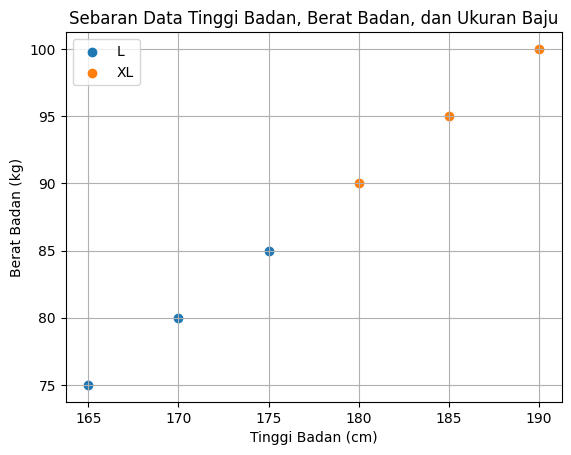

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for ukr_baju, d in UkuranBaju_df.groupby('ukr_baju'):
    ax.scatter(d['tinggi'], d['berat'], label=ukr_baju)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Ukuran Baju')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

3. CLASSIFICATION DENGAN KNN

Preprocessing Dataset

In [22]:
import numpy as np

X_train = np.array(UkuranBaju_df[['tinggi', 'berat']])
y_train = np.array(UkuranBaju_df['ukr_baju'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[170  80]
 [175  85]
 [180  90]
 [185  95]
 [190 100]
 [165  75]]

y_train: ['L' 'L' 'XL' 'XL' 'XL' 'L']


In [5]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]]


4. TRAINING KNN CLASSIFICATION  MODEL

In [24]:

from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

5. PREDIKSI UKURAN BAJU

In [25]:
tinggi_badan = 177
berat_badan = 83
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[177,  83]])

In [26]:
y_new = model.predict(X_new)
y_new

array([0])

In [27]:
lb.inverse_transform(y_new)

array(['L'], dtype='<U2')

6. VISUALISASI NEAREST NEIGHBOURS

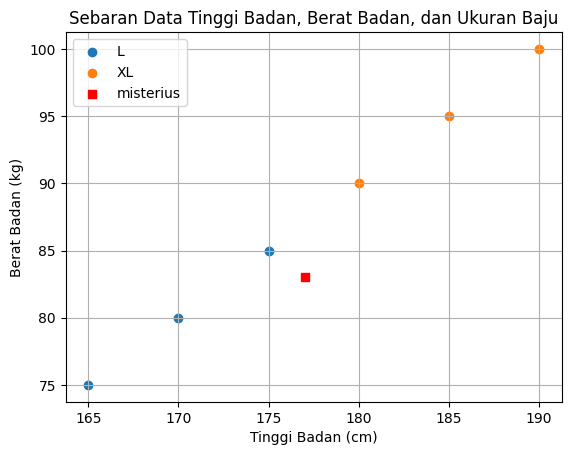

In [29]:
fig, ax = plt.subplots()
for ukr_baju, d in UkuranBaju_df.groupby('ukr_baju'):
    ax.scatter(d['tinggi'], d['berat'], label=ukr_baju)

plt.scatter(tinggi_badan,
            berat_badan,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Ukuran Baju')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

7. KALKULASI DISTANCE (EUCLIDEAN DISTANCE)

In [30]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([177,  83])

In [31]:
X_train

array([[170,  80],
       [175,  85],
       [180,  90],
       [185,  95],
       [190, 100],
       [165,  75]], dtype=int64)

In [32]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[7.615773105863909,
 2.8284271247461903,
 7.615773105863909,
 14.422205101855956,
 21.400934559032695,
 14.422205101855956]

In [34]:
UkuranBaju_df['jarak'] = data_jarak
UkuranBaju_df.sort_values(['jarak'])

,tinggi,berat,ukr_baju,jarak
1,175,85,L,2.828427
0,170,80,L,7.615773
2,180,90,XL,7.615773
3,185,95,XL,14.422205
5,165,75,L,14.422205
4,190,100,XL,21.400935


8. EVALUASI KNN CLASSIFICATION MODEL

In [39]:
#TESTING SET
X_test = np.array([[168, 71], [182, 96], [177, 79], [188, 90]])
y_test = lb.transform(np.array(['L', 'XL', 'L', 'XL'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[168  71]
 [182  96]
 [177  79]
 [188  90]]

y_test:
[0 1 0 1]


In [40]:
#PREDIKSI TERHADAP TESTING
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1])

In [41]:
#ACCUARCY
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 1.0


In [42]:
#PRECISSION
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 1.0


In [43]:
#RECALL
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 1.0


In [44]:
#F1 SCORE
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 1.0


In [45]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [46]:
#Matthews Correlation Coefficient (MCC)
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 1.0


KESIMPULAN

Dari model yang sudah dibentuk dan telah diuji. Dari classification report yang dihasilkan, terlihat bahwa model memiliki kinerja yang sangat baik dengan nilai presisi, recall, dan f1-score sebesar 1 untuk kedua kelas (0 dan 1). Keseluruhan, hasil dari classification report menunjukkan bahwa model sangat baik dalam melakukan klasifikasi, dengan kinerja sempurna untuk kedua kelas yang diamati. Dengan nilai akurasi 1, model dapat diandalkan dalam melakukan prediksi dengan sangat baik.